In [14]:
# Import libraries and dependencies 

import pandas as pd
from pathlib import Path
import datetime
import numpy as np


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Set file paths
mortgage_path = Path("mortgage_rates.xlsx")
inflation_path = Path("1810025901_databaseLoadingData.csv")
boc_path = Path("BankofCanadaRateHistory.csv")
bond_path = Path("1010013901_databaseLoadingData (2).csv")

In [4]:
#read in csv and xlsx files
inflation_df = pd.read_csv(inflation_path)
boc_df = pd.read_csv(boc_path, index_col="Date")
boc_df.head()
mortgage_df = pd.read_excel(mortgage_path, index_col="Date")
bond_df = pd.read_csv(bond_path)

In [5]:
#dropping extra columns
bond_df = bond_df.drop(columns=['GEO',
                           'DGUID',  
                           'UOM', 
                           'UOM_ID', 
                           'SCALAR_FACTOR', 
                           'SCALAR_ID', 
                           'VECTOR', 
                           'COORDINATE', 
                           'STATUS', 
                           'SYMBOL', 
                           'TERMINATED', 
                           'DECIMALS',
                            'Financial market statistics'])



In [6]:
#isolate 5, 10, and long term benchmark bond yeilds
bond_5 = bond_df.loc[:10916]
bond_5.reset_index(inplace=True, drop=True)

bond_10 = bond_df.loc[10917:21833]
bond_10.reset_index(inplace=True, drop=True)

bond_long = bond_df.loc[21834:]
bond_long.reset_index(inplace=True, drop=True)

In [7]:
bond_combined = pd.concat([bond_5, bond_10, bond_long], join="inner", axis=1)
bond_combined

,REF_DATE,VALUE,REF_DATE,VALUE,REF_DATE,VALUE
0,1990-01-28,0.00,1990-01-28,0.00,1990-01-28,0.00
1,1990-01-29,10.07,1990-01-29,10.00,1990-01-29,9.89
2,1990-01-31,10.02,1990-01-31,9.93,1990-01-31,9.75
3,1990-02-01,10.05,1990-02-01,9.94,1990-02-01,9.74
4,1990-02-02,10.07,1990-02-02,9.97,1990-02-02,9.79
...,...,...,...,...,...,...
10912,2021-11-27,0.00,2021-11-27,0.00,2021-11-27,0.00
10913,2021-11-28,0.00,2021-11-28,0.00,2021-11-28,0.00
10914,2021-11-29,1.41,2021-11-29,1.61,2021-11-29,1.94
10915,2021-11-30,1.40,2021-11-30,1.58,2021-11-30,1.89


In [8]:
bond_combined.columns = ['date', '5_year_bond_benchmark', 'date2', '10_year_bond_benchmark', 'date3','long_term_bond_benchmark']

In [9]:
bond_combined.drop(columns=['date2', 'date3'], inplace=True)


,date,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark
0,1990-01-28,0.00,0.00,0.00
1,1990-01-29,10.07,10.00,9.89
2,1990-01-31,10.02,9.93,9.75
3,1990-02-01,10.05,9.94,9.74
4,1990-02-02,10.07,9.97,9.79
...,...,...,...,...
10912,2021-11-27,0.00,0.00,0.00
10913,2021-11-28,0.00,0.00,0.00
10914,2021-11-29,1.41,1.61,1.94
10915,2021-11-30,1.40,1.58,1.89


In [22]:
#Pick non-zero values which turns all zero values into nan and remove nan-values
bond_combined = bond_combined[bond_combined!=0].dropna()

In [23]:
#determine monthly average yeild for each bond length to align weith other datasets
bond_combined.groupby(pd.PeriodIndex(bond_combined['date'], freq="M"))['5_year_bond_benchmark','10_year_bond_benchmark','long_term_bond_benchmark'].mean().reset_index()

,date,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark
0,1990-01,10.045000,9.965000,9.820000
1,1990-02,10.538182,10.253636,9.999091
2,1990-03,11.147692,10.761538,10.596154
3,1990-04,12.175000,11.519286,11.275714
4,1990-05,11.741538,11.125385,10.990000
...,...,...,...,...
379,2021-08,0.837143,1.191905,1.755238
380,2021-09,0.884000,1.263000,1.803500
381,2021-10,1.258500,1.597000,2.007500
382,2021-11,1.465000,1.686000,2.028000


<AxesSubplot:xlabel='Date'>

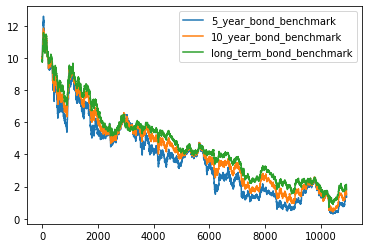

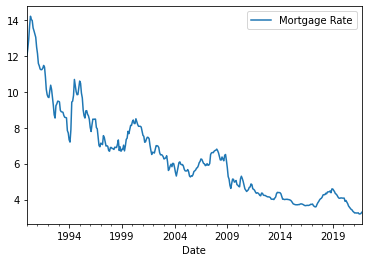

In [28]:
mortgage_df2 = mortgage_df.loc["01-01-1990":]
bond_combined.plot()
mortgage_df2.plot()

In [10]:
#isloate data from 1990 to present for datasets
mortgage_df2 = mortgage_df.loc["01-01-1990":]


In [11]:
boc_df2 = boc_df.loc["Jan 1990":]

In [12]:
inflation_df = inflation_df.drop(columns=['GEO',
                           'DGUID',
                           'Alternative measures', 
                           'Release', 
                           'UOM', 
                           'UOM_ID', 
                           'SCALAR_FACTOR', 
                           'SCALAR_ID', 
                           'VECTOR', 
                           'COORDINATE', 
                           'STATUS', 
                           'SYMBOL', 
                           'TERMINATED', 
                           'DECIMALS'])
                

C:\Users\Curtis\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

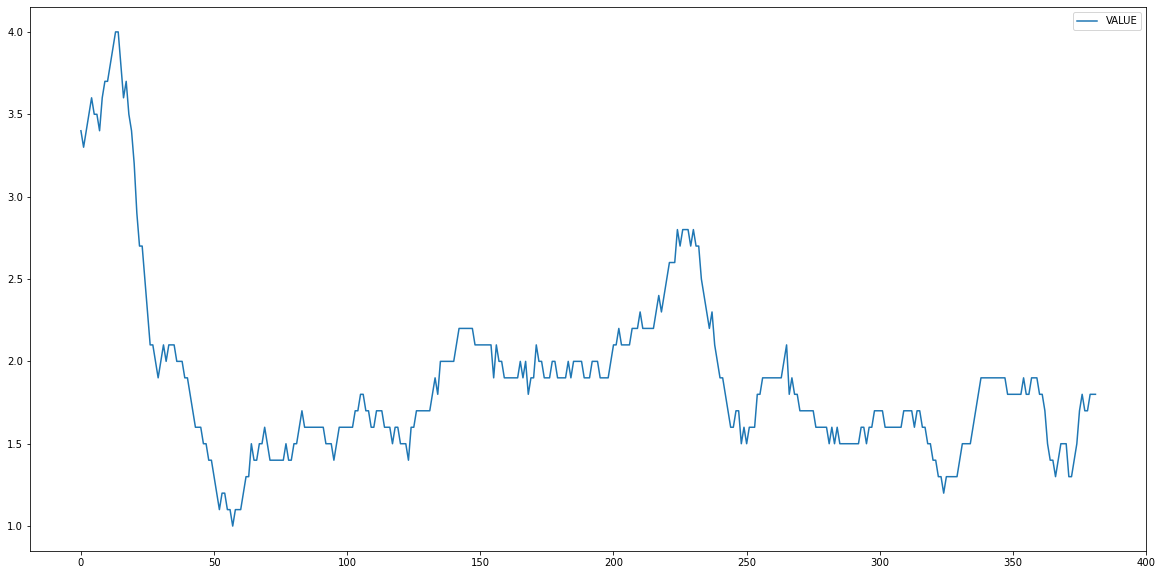

In [13]:
inflation_common = inflation_df.loc[0:381]
inflation_common.reset_index(inplace=True)
inflation_common.drop(columns=['index'], inplace=True)
inflation_common.head()
inflation_common.plot(figsize=(20,10))

In [14]:
inflation_weighted_median = inflation_df.loc[1910:2292] 
inflation_weighted_median.reset_index(inplace=True, drop=True)
inflation_weighted_median.head()

,REF_DATE,VALUE
0,1990-01,4.7
1,1990-02,4.5
2,1990-03,4.3
3,1990-04,4.2
4,1990-05,4.0


In [15]:
inflation_trimmed_median = inflation_df.loc[3820:4202]
inflation_trimmed_median.reset_index(inplace=True, drop=True)
inflation_trimmed_median.head()

,REF_DATE,VALUE
0,1990-01,4.9
1,1990-02,4.7
2,1990-03,4.6
3,1990-04,4.5
4,1990-05,4.3


In [16]:
inflation_combined = pd.concat([inflation_common, inflation_trimmed_median, inflation_weighted_median], join="inner", axis=1)
inflation_combined

,REF_DATE,VALUE,REF_DATE,VALUE,REF_DATE,VALUE
0,1990-01,3.4,1990-01,4.9,1990-01,4.7
1,1990-02,3.3,1990-02,4.7,1990-02,4.5
2,1990-03,3.4,1990-03,4.6,1990-03,4.3
3,1990-04,3.5,1990-04,4.5,1990-04,4.2
4,1990-05,3.6,1990-05,4.3,1990-05,4.0
...,...,...,...,...,...,...
377,2021-06,1.7,2021-06,2.6,2021-06,2.4
378,2021-07,1.7,2021-07,3.1,2021-07,2.7
379,2021-08,1.8,2021-08,3.2,2021-08,2.8
380,2021-09,1.8,2021-09,3.3,2021-09,2.9


In [17]:
inflation_combined.columns = ['date', 'inflation_common', 'date2', 'inflation_trimmed_median', 'date3','inflation_weighted_median']
inflation_combined.head()

,date,inflation_common,date2,inflation_trimmed_median,date3,inflation_weighted_median
0,1990-01,3.4,1990-01,4.9,1990-01,4.7
1,1990-02,3.3,1990-02,4.7,1990-02,4.5
2,1990-03,3.4,1990-03,4.6,1990-03,4.3
3,1990-04,3.5,1990-04,4.5,1990-04,4.2
4,1990-05,3.6,1990-05,4.3,1990-05,4.0


In [18]:
inflation_combined.drop(columns=['date2','date3'], inplace=True)


In [39]:
inflation_combined.head()

,date,inflation_common,inflation_trimmed_median,inflation_weighted_median
0,1990-01,3.4,4.9,4.7
1,1990-02,3.3,4.7,4.5
2,1990-03,3.4,4.6,4.3
3,1990-04,3.5,4.5,4.2
4,1990-05,3.6,4.3,4.0


In [20]:
mortgage_rate_df = pd.read_excel(file_path, index_col='Date')
mortgage_rate_df.head()

,Mortgage Rate
Date,
1951-06-01,5.50
1951-07-01,5.62
1951-08-01,5.62
1951-09-01,5.75
1951-10-01,5.75


In [22]:
mortgage_rate_df['Monthly Change'] = mortgage_rate_df.pct_change()

In [23]:
# Select only the returns
monthly_change = mortgage_rate_df.loc[:, 'Monthly Change']

In [24]:
# Import the ARMA model
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARIMA(monthly_change.values, order=(1,0,1))

<AxesSubplot:xlabel='REF_DATE'>

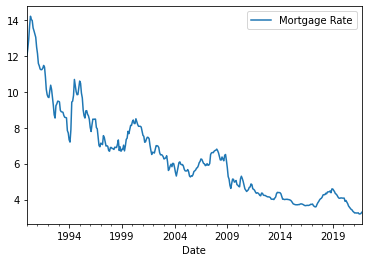

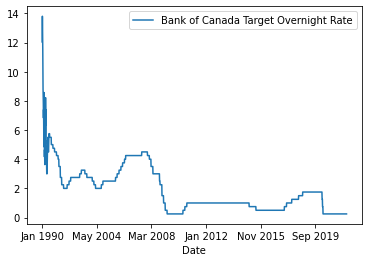

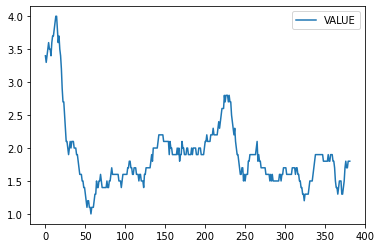

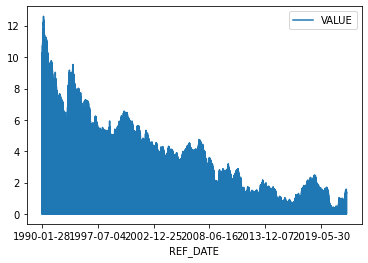

In [27]:
mortgage_df2.plot()
boc_df2.plot()
inflation_common.plot()
bond_5.plot(kind='line')